In [1]:
from app.dataManager import *
import math
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.30/02


In [2]:
def valid_sample_condition(name):
    return 'Showering' not in name and 'Sub-GeV' not in name and 'pi^{0}' not in name and '*' not in name

def get_counts(ana_master):
    tot_counts = []
    for i in range(len(ana_master.samples)):
        s = ana_master.samples[i]
        if valid_sample_condition(s.name):
            tot_counts += list(get_counts_from_hist(ana_master.samples[i].data_hist))
    return tot_counts

In [3]:
tag = 'A'
binning_file= '../fake_data/FDS_'+tag+'/binning.txt'
data_folder = '../fake_data/FDS_'+tag+'/unoscillated/'
tag = 'FDS_'+tag
osc_pred = AnaMaster(data_folder=data_folder, binning_file=binning_file, scale_to_HK=True)
nom_pred = AnaMaster(data_folder=data_folder, binning_file=binning_file, scale_to_HK=True)

osc_pred.osc_weight_all()
osc_pred.fill_histograms()

Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
Reaction Name: MCNumuBar
Reaction Name: MCNutau
Reaction Name: MCNC
Reaction Name: MCNue
Reaction Name: MCNumu
Reaction Name: MCNueBar
Reaction Name: MCTotal
MASK BINS:  True
Loading Density profile from: /Users/cjesus/AtmInKamioka/config/full.PREM.dat
Loading Density profile from: /Users/cjesus/AtmInKamioka/config/full.PREM.dat


Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNutau (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNumuBar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNumu (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNueBar (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*  MCNue (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 0 d.e.*Data (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 1 d.e.*  MCNC (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Sub-GeV  e-like 1 d.e.*  MCNutau (Potential memory leak).
Warning in <TROOT::Ap

In [9]:
all_obs = []
all_exp = []
all_chi2 = []
all_names = []
sample_edges = []
sample_edges.append(0)

for i in range(len(nom_pred.samples)):
    
    s = nom_pred.samples[i]
    if valid_sample_condition(s.name):

        observed = get_counts_from_hist(osc_pred.samples[i].data_hist)
        expected = get_counts_from_hist(nom_pred.samples[i].data_hist)

        for E,O in zip(observed, expected):
            all_chi2.append((E-O)+O*np.log(O/E))
            all_obs.append(O)
            all_exp.append(E)

        sample_edges.append(len(all_exp))
        all_names.append(s.name)
        
        chi2 = calc_chi2(expected, observed)
        print(s.name, s.nbins, chi2)

all_obs =  np.reshape(all_obs,-1)
all_exp =  np.reshape(all_exp,-1)
all_chi2 = np.reshape(all_chi2,-1)

sample_edges = np.array(sample_edges)

Multi-GeV Multi-Ring #nu_{e}-like 30 253.47249043638092
Multi-GeV Multi-Ring #bar{#nu}_{e}-like 30 81.33550206583425
Multi-GeV Multi-Ring #mu-like 80 2772.0946825965793
Multi-GeV Multi-Ring  Other 30 590.4915677270092
PC  Stopping 20 420.6660686030391
PC  Through-going 70 2827.2504460045475
Up-#mu Stopping 50 2718.583312793187
Multi-GeV #nu_{e}-like 20 57.10733594123216
Multi-GeV #bar{#nu}_{e}-like 0 n 30 22.66564835044108
Multi-GeV #bar{#nu}_{e}-like 1 n 30 29.682553873996675
Multi-GeV #nu_{#mu}-like 20 2380.689925056339
Multi-GeV #bar{#nu}_{#mu}-like 20 959.7916222016386


In [15]:
sample_center = sample_edges[0:-1]+(sample_edges[1:]-sample_edges[0:-1])/2

0 Multi-GeV Multi-Ring #nu_{e}-like
1 Multi-GeV Multi-Ring #bar{#nu}_{e}-like
2 Multi-GeV Multi-Ring #mu-like
3 Multi-GeV Multi-Ring  Other
4 PC  Stopping
5 PC  Through-going
6 Up-#mu Stopping
7 Multi-GeV #nu_{e}-like
8 Multi-GeV #bar{#nu}_{e}-like 0 n
9 Multi-GeV #bar{#nu}_{e}-like 1 n
10 Multi-GeV #nu_{#mu}-like
11 Multi-GeV #bar{#nu}_{#mu}-like


(0.0, 430.0)

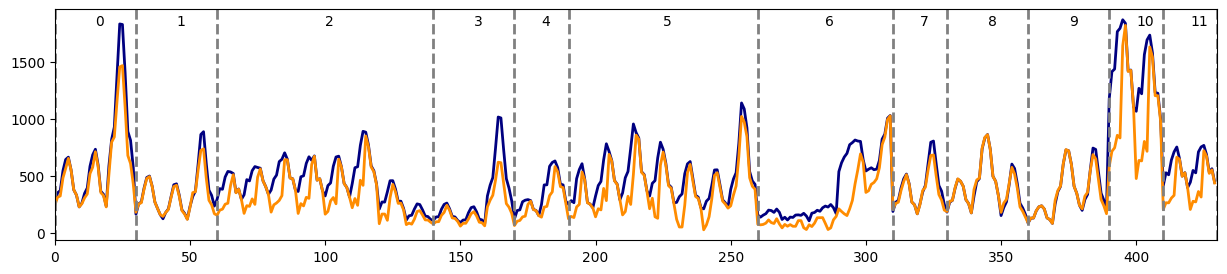

In [24]:
plt.figure(figsize=(15, 3))

N = len(all_obs)

plt.plot(range(N), all_obs, lw=2, color='navy')
plt.plot(range(N), all_exp, lw=2, color='darkorange')

for x in sample_edges:
    plt.axvline(x, lw=2, color='gray', linestyle='--')

for i,x in enumerate(sample_center):
    #plt.text(x, max(all_exp), all_names[i], rotation=90)
    plt.text(x, max(all_exp), i)

    print(i, all_names[i])

plt.gca().set_xlim(0,N)

(0.0, 430.0)

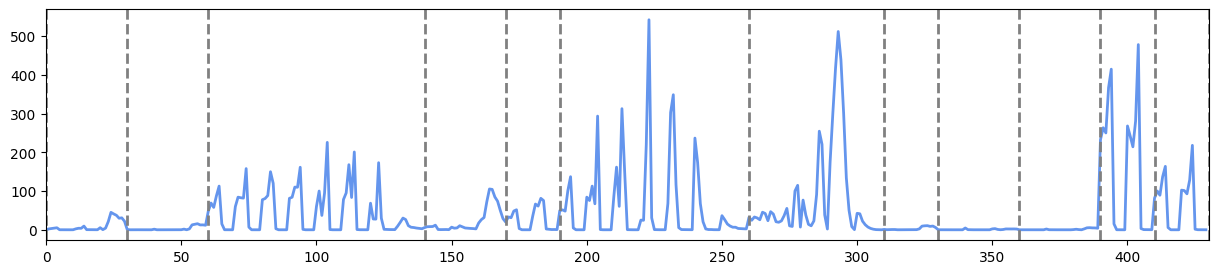

In [7]:
plt.figure(figsize=(15, 3))

N = len(all_obs)

plt.plot(range(N), all_chi2, lw=2, color='cornflowerblue')

for x in sample_edges:
    plt.axvline(x, lw=2, color='gray', linestyle='--')

plt.gca().set_xlim(0,N)